In [1]:
urls = [ 
    'https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/',
    'https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/',
    'https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/',
    'https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/',
    'https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/',
    'https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/',
    'https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/',
    'https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/',
    'https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/',
    'https://scrapsfromtheloft.com/2019/11/08/seth-meyers-lobby-baby-transcript/',
    'https://scrapsfromtheloft.com/2020/05/02/jim-norton-american-degenerate-transcript/',
    'https://scrapsfromtheloft.com/2020/05/01/daniel-sloss-x-transcript/'
]

In [2]:
names = [
    'jerry-seinfeld',
    'jo-koy',
    'mark-normand',
    'jimmy-oyang',
    'ramy-yousef',
    'pete-davidson',
    'billy-connolly',
    'patton-oswalt',
    'lee-mack',
    'seth-meyers',
    'jim-norton',
    'daniel-sloss'
]

In [3]:
times = [ 60,
         60,
         56,
         56,
         56,
         49,
         96,
         67,
         67,
         61,
         61,
         89]

In [4]:
len(urls)

12

In [5]:
len(names)

12

In [6]:
len(times)

12

# importing data

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.DataFrame([urls,names,times]).T

In [9]:
data.columns = ['urls','names','times']

In [10]:
data = data.set_index('names')
pd.set_option('max_colwidth',150)
data

,urls,times
names,,
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60
jo-koy,https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/,60
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56
ramy-yousef,https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/,56
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67


In [11]:
import requests 
from bs4 import BeautifulSoup

In [12]:
page = requests.get(data['urls'].iloc[0]).text

In [15]:
page[:200]

'<!DOCTYPE html>\n<html class="avada-html-layout-wide avada-html-header-position-top" lang="en-GB" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n<head>\n\t<meta http-equiv="X-UA-Compatible" con'

In [16]:
soup = BeautifulSoup(page, 'lxml')

In [20]:
soup.p #first paragraph element in the document

<p><strong>Jerry Seinfeld’s new hourlong comedy special, <em>Jerry Seinfeld: 23 Hours to Kill</em> is now available on <a href="https://www.netflix.com/title/80170847">Netflix</a></strong></p>

In [22]:
text = [p.text for p in soup.find(class_='post-content').find_all('p')]
text[0]

'Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix'

In [23]:
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find(class_='post-content').find_all('p')]
    return text

In [24]:
data

,urls,times
names,,
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60
jo-koy,https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/,60
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56
ramy-yousef,https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/,56
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67


In [25]:
transcripts = []
for i,url in enumerate(urls):
    transcripts.append(' '.join(url_to_transcript(url )))

In [32]:
transcripts[0][:200]

'Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we see Seinfield arriving at New York’s Beacon Theater aft'

In [33]:
data["transcripts"] = transcripts
data

,urls,times,transcripts
names,,,
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s..."
jo-koy,https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/,60,"[hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ..."
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56,"Mark Normand: One minute. Amy Schumer: Mark, listen. I know exactly what you’re thinking right now. You’re thinking, this is my first hour special..."
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever..."
ramy-yousef,https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/,56,"Welcome to the meeting. Are you Mohammed? No, ’cause this dude texted me, and he was like, “Yo, can I…” He hit me up. He was like, “Oh, can I get ..."
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, ..."
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96,"Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma..."
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67,"This is the full transcript of Patton Oswalt: I Love Everything (2020), released on Netflix on May 19, 2020. Patton Oswalt has seen extreme highs ..."
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67,"This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee..."


# cleaning data

In [34]:
data['transcripts']['jerry-seinfeld'][:200]

'Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we see Seinfield arriving at New York’s Beacon Theater aft'

In [35]:
import string
import re

In [36]:
data['transcripts']['jerry-seinfeld'].lower()[:200]

'jerry seinfeld’s new hourlong comedy special, jerry seinfeld: 23 hours to kill is now available on netflix [in the first scene of the special we see seinfield arriving at new york’s beacon theater aft'

In [37]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #punctions
    text = re.sub('\w*\d\w*', '', text) #digits
    text = re.sub('[’’“”…]', '', text) #quotes
    text = re.sub('\n', '', text) #newlines
    text = re.sub('♪', '', text) #symbols
    text = re.sub('–', '', text) #dashes
    return text

cleaningRound = lambda x: clean_text(x)

In [38]:
cleanedDF = pd.DataFrame(data['transcripts'].apply(cleaningRound))
cleanedDF

,transcripts
names,
jerry-seinfeld,jerry seinfelds new hourlong comedy special jerry seinfeld hours to kill is now available on netflix elicopeter pilot mr seinfeld you have a sho...
jo-koy,la are you ready live from the alex theatre give it up for jo koy what what oh shit wow were in los angel this is why i love coming home to los ...
mark-normand,mark normand one minute amy schumer mark listen i know exactly what youre thinking right now youre thinking this is my first hour special and im f...
jimmy-oyang,announcer ladies and gentlemen welcome to the stage jimmy o yang hows everybody doing yes yes thank you thank you guys very much for coming out ...
ramy-yousef,welcome to the meeting are you mohammed no cause this dude texted me and he was like yo can i he hit me up he was like oh can i get a ticket to yo...
pete-davidson,so louis ck tried to get me fired from snl my first year and this is that story so its like or uh and its the finale of snl and ii was so shocke...
billy-connolly,ladies and gentlemen would you please welcome billy connolly youre only doing that because im not well i love you billy im not a well man well hav...
patton-oswalt,this is the full transcript of patton oswalt i love everything released on netflix on may patton oswalt has seen extreme highs and lows in the ...
lee-mack,this programme contains strong language over dates across the country but this is the big one the one hes really been looking forward to the bes...


# Vectorizing Data

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
countVec = CountVectorizer(stop_words='english')
cv = countVec.fit_transform(cleanedDF.transcripts)
countVec.get_feature_names()[:20]

['aaa',
 'aaaa',
 'aaaaaa',
 'aah',
 'aahoh',
 'aall',
 'aand',
 'aarrives',
 'abandoned',
 'abcore',
 'abductable',
 'abduction',
 'abe',
 'aberdeen',
 'aberdeenshire',
 'aberdonian',
 'abhorrent',
 'abide',
 'ability',
 'able']

In [43]:
cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
docTermMatrix = pd.DataFrame(cv.toarray(), columns=countVec.get_feature_names())
docTermMatrix.index = cleanedDF.index
docTermMatrix

,aaa,aaaa,aaaaaa,aah,aahoh,aall,aand,aarrives,abandoned,abcore,...,zealots,zen,zero,zest,ziploc,zither,zones,zoo,zumba,zz
names,,,,,,,,,,,,,,,,,,,,,
jerry-seinfeld,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jo-koy,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mark-normand,0,0,0,6,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,0
jimmy-oyang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
ramy-yousef,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pete-davidson,0,0,0,0,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
billy-connolly,2,3,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
patton-oswalt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
lee-mack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Analysis 
1. most common words
1. breadth of vocabulary
1. profanity

positivity/negativity and subjectivity/objectivity

In [45]:
dtm = docTermMatrix.T
dtm.head()

names,jerry-seinfeld,jo-koy,mark-normand,jimmy-oyang,ramy-yousef,pete-davidson,billy-connolly,patton-oswalt,lee-mack,seth-meyers,jim-norton,daniel-sloss
aaa,0,0,0,0,0,0,2,0,0,0,0,0
aaaa,0,0,0,0,0,0,3,0,0,0,0,0
aaaaaa,0,0,0,0,0,0,1,0,0,0,0,0
aah,0,7,6,0,2,0,0,0,0,0,6,3
aahoh,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
dtm.columns

Index(['jerry-seinfeld', 'jo-koy', 'mark-normand', 'jimmy-oyang',
       'ramy-yousef', 'pete-davidson', 'billy-connolly', 'patton-oswalt',
       'lee-mack', 'seth-meyers', 'jim-norton', 'daniel-sloss'],
      dtype='object', name='names')

In [47]:
topDict = {}
for col in dtm.columns:
    top = dtm[col].sort_values(ascending=False).head(30)
    topDict[col] = list(zip(top.index, top.values))
    
topDict['jerry-seinfeld']

[('dont', 81),
 ('like', 62),
 ('im', 48),
 ('know', 47),
 ('just', 44),
 ('youre', 36),
 ('people', 31),
 ('thats', 30),
 ('say', 29),
 ('life', 26),
 ('think', 25),
 ('phone', 23),
 ('great', 23),
 ('right', 22),
 ('gonna', 20),
 ('wanna', 20),
 ('gotta', 20),
 ('love', 19),
 ('little', 19),
 ('got', 18),
 ('things', 18),
 ('want', 17),
 ('thing', 17),
 ('oh', 17),
 ('lets', 16),
 ('lot', 16),
 ('did', 16),
 ('come', 16),
 ('feel', 15),
 ('time', 15)]

In [48]:
pd.DataFrame.from_dict(topDict)

,jerry-seinfeld,jo-koy,mark-normand,jimmy-oyang,ramy-yousef,pete-davidson,billy-connolly,patton-oswalt,lee-mack,seth-meyers,jim-norton,daniel-sloss
0,"(dont, 81)","(like, 107)","(like, 218)","(like, 248)","(like, 333)","(like, 381)","(said, 136)","(like, 122)","(said, 83)","(said, 74)","(like, 187)","(like, 269)"
1,"(like, 62)","(just, 63)","(yeah, 124)","(just, 95)","(just, 96)","(know, 199)","(im, 72)","(im, 76)","(im, 65)","(like, 74)","(know, 79)","(just, 138)"
2,"(im, 48)","(mom, 62)","(know, 113)","(im, 77)","(know, 90)","(uh, 167)","(know, 71)","(just, 59)","(dont, 62)","(wife, 51)","(just, 66)","(im, 127)"
3,"(know, 47)","(im, 60)","(im, 105)","(know, 76)","(dont, 66)","(just, 101)","(like, 60)","(know, 52)","(got, 54)","(im, 46)","(im, 52)","(know, 105)"
4,"(just, 44)","(right, 53)","(right, 79)","(thats, 62)","(im, 60)","(right, 94)","(oh, 58)","(gonna, 49)","(like, 51)","(say, 44)","(dont, 51)","(fucking, 97)"
5,"(youre, 36)","(josep, 53)","(dont, 73)","(dont, 62)","(think, 53)","(im, 72)","(dont, 58)","(theres, 40)","(know, 40)","(think, 40)","(thats, 35)","(thats, 89)"
6,"(people, 31)","(know, 50)","(just, 66)","(asian, 54)","(thats, 46)","(yeah, 67)","(got, 55)","(oh, 38)","(right, 39)","(just, 40)","(youre, 35)","(dont, 85)"
7,"(thats, 30)","(dont, 45)","(youre, 64)","(got, 48)","(really, 44)","(dont, 57)","(just, 54)","(thats, 35)","(going, 38)","(know, 33)","(people, 30)","(oh, 51)"
8,"(say, 29)","(got, 37)","(thats, 64)","(people, 44)","(youre, 44)","(cause, 46)","(says, 54)","(dont, 34)","(say, 33)","(people, 28)","(want, 30)","(youre, 50)"
9,"(life, 26)","(shit, 34)","(guy, 48)","(man, 40)","(theres, 33)","(youre, 45)","(fucking, 43)","(okay, 33)","(thats, 32)","(thing, 24)","(hes, 29)","(going, 50)"


In [49]:
words = []
for comedian in dtm.columns:
    top = [word for (word,count) in topDict[comedian]]
    for t in top:
        words.append(t)
words[:20]

['dont',
 'like',
 'im',
 'know',
 'just',
 'youre',
 'people',
 'thats',
 'say',
 'life',
 'think',
 'phone',
 'great',
 'right',
 'gonna',
 'wanna',
 'gotta',
 'love',
 'little',
 'got']

In [50]:
np.unique(words,return_counts=True)

(array(['american', 'asian', 'ass', 'baby', 'big', 'blog', 'cause',
        'chinese', 'come', 'dad', 'daddy', 'day', 'dennys', 'did', 'didnt',
        'doing', 'dont', 'feel', 'fuck', 'fuckin', 'fucking', 'gay',
        'girl', 'god', 'goes', 'going', 'gonna', 'good', 'got', 'gotta',
        'grandma', 'great', 'guy', 'guys', 'half', 'happen', 'hes', 'hey',
        'huh', 'ill', 'im', 'ive', 'jimmy', 'jo', 'josep', 'just', 'kids',
        'know', 'lee', 'lets', 'life', 'like', 'little', 'look', 'lot',
        'love', 'make', 'man', 'mean', 'men', 'mom', 'night', 'oh', 'ok',
        'okay', 'old', 'people', 'phone', 'really', 'right', 'said', 'say',
        'says', 'sex', 'shes', 'shit', 'sleep', 'son', 'sorry', 'tell',
        'thank', 'thats', 'theres', 'theyre', 'thing', 'things', 'think',
        'thought', 'time', 'uh', 'um', 'wanna', 'want', 'way', 'wedding',
        'went', 'whats', 'wife', 'women', 'yeah', 'years', 'youre',
        'youve'], dtype='<U8'),
 array([ 1,  1,  1,  1

In [51]:
topWordFrequency = np.vstack(np.unique(words,return_counts=True)[::-1]).T
topWordFrequency[:10]

array([['1', 'american'],
       ['1', 'asian'],
       ['1', 'ass'],
       ['1', 'baby'],
       ['1', 'big'],
       ['1', 'blog'],
       ['4', 'cause'],
       ['1', 'chinese'],
       ['2', 'come'],
       ['3', 'dad']], dtype='<U21')

In [52]:
topWordFrequency = topWordFrequency[np.argsort(topWordFrequency[:,0].astype(int))][::-1]
topWordFrequency[:15]

array([['12', 'like'],
       ['12', 'im'],
       ['12', 'just'],
       ['12', 'know'],
       ['12', 'dont'],
       ['12', 'oh'],
       ['11', 'thats'],
       ['11', 'youre'],
       ['11', 'right'],
       ['11', 'got'],
       ['9', 'people'],
       ['8', 'think'],
       ['8', 'time'],
       ['7', 'fucking'],
       ['7', 'look']], dtype='<U21')

In [53]:
add_stop_words = [word for count,word in topWordFrequency if int(count) >= 9]
add_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'oh',
 'thats',
 'youre',
 'right',
 'got',
 'people']

In [63]:
from sklearn.feature_extraction import text
list(text.ENGLISH_STOP_WORDS)[:20]

['must',
 'again',
 'beside',
 'ltd',
 'others',
 'always',
 'though',
 'even',
 'everyone',
 'alone',
 'is',
 'besides',
 'either',
 'around',
 'still',
 'onto',
 'otherwise',
 'as',
 'fill',
 'wherever']

In [65]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
list(stop_words)[:20]

['enough',
 'yourselves',
 'must',
 'somewhere',
 'again',
 'fifteen',
 'give',
 'can',
 'throughout',
 'beside',
 'four',
 'he',
 'ltd',
 'others',
 'always',
 'how',
 'none',
 'though',
 'even',
 'everyone']

In [66]:
cv = CountVectorizer(stop_words=stop_words)
cleanedDF

,transcripts
names,
jerry-seinfeld,jerry seinfelds new hourlong comedy special jerry seinfeld hours to kill is now available on netflix elicopeter pilot mr seinfeld you have a sho...
jo-koy,la are you ready live from the alex theatre give it up for jo koy what what oh shit wow were in los angel this is why i love coming home to los ...
mark-normand,mark normand one minute amy schumer mark listen i know exactly what youre thinking right now youre thinking this is my first hour special and im f...
jimmy-oyang,announcer ladies and gentlemen welcome to the stage jimmy o yang hows everybody doing yes yes thank you thank you guys very much for coming out ...
ramy-yousef,welcome to the meeting are you mohammed no cause this dude texted me and he was like yo can i he hit me up he was like oh can i get a ticket to yo...
pete-davidson,so louis ck tried to get me fired from snl my first year and this is that story so its like or uh and its the finale of snl and ii was so shocke...
billy-connolly,ladies and gentlemen would you please welcome billy connolly youre only doing that because im not well i love you billy im not a well man well hav...
patton-oswalt,this is the full transcript of patton oswalt i love everything released on netflix on may patton oswalt has seen extreme highs and lows in the ...
lee-mack,this programme contains strong language over dates across the country but this is the big one the one hes really been looking forward to the bes...


In [67]:
data_cv = cv.fit_transform(cleanedDF.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = cleanedDF.index

In [68]:
cv.get_feature_names()[:5]

['aaa', 'aaaa', 'aaaaaa', 'aah', 'aahoh']

In [69]:
from wordcloud import WordCloud

In [70]:
wc = WordCloud(stopwords = stop_words, background_color="white", colormap = "Dark2", max_font_size=150)

In [71]:
import matplotlib.pyplot as plt

In [72]:
plt.rcParams['figure.figsize'] = [16,6]
names

['jerry-seinfeld',
 'jo-koy',
 'mark-normand',
 'jimmy-oyang',
 'ramy-yousef',
 'pete-davidson',
 'billy-connolly',
 'patton-oswalt',
 'lee-mack',
 'seth-meyers',
 'jim-norton',
 'daniel-sloss']

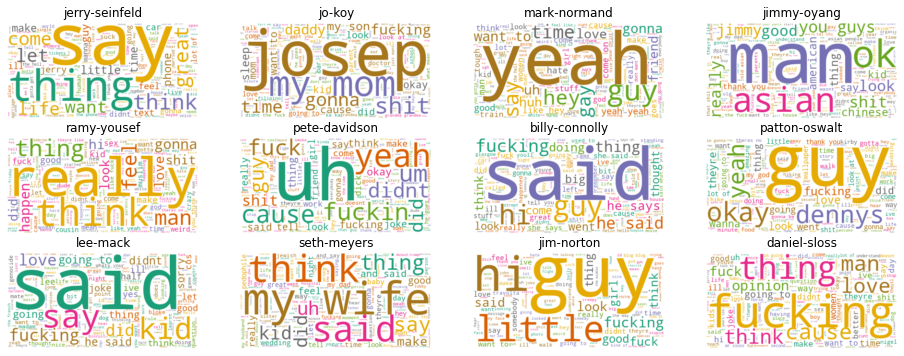

In [73]:
for index,comedian in enumerate(cleanedDF.T.columns):
    wc.generate(cleanedDF.transcripts[comedian])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(comedian)

# Breadth of Vocab

In [74]:
dtm

names,jerry-seinfeld,jo-koy,mark-normand,jimmy-oyang,ramy-yousef,pete-davidson,billy-connolly,patton-oswalt,lee-mack,seth-meyers,jim-norton,daniel-sloss
aaa,0,0,0,0,0,0,2,0,0,0,0,0
aaaa,0,0,0,0,0,0,3,0,0,0,0,0
aaaaaa,0,0,0,0,0,0,1,0,0,0,0,0
aah,0,7,6,0,2,0,0,0,0,0,6,3
aahoh,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zither,0,0,0,0,0,0,1,0,0,0,0,0
zones,0,0,0,0,0,0,0,0,0,0,1,0
zoo,0,0,0,1,0,0,0,0,0,0,0,0
zumba,0,0,0,0,0,0,0,1,0,0,1,0


In [75]:
len(np.array(dtm['pete-davidson']).nonzero()[0])

1042

In [76]:
uniques = []
for comedian in dtm.columns:
    currUniques = np.array(dtm[comedian]).nonzero()[0].size
    uniques.append(currUniques)
uniques

[1424, 737, 1220, 1219, 975, 1042, 1902, 1409, 1424, 1205, 1322, 1807]

In [77]:
data["uniques_count"] = uniques

In [78]:
data

,urls,times,transcripts,uniques_count
names,,,,
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",1424
jo-koy,https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/,60,"[hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...",737
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56,"Mark Normand: One minute. Amy Schumer: Mark, listen. I know exactly what you’re thinking right now. You’re thinking, this is my first hour special...",1220
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...",1219
ramy-yousef,https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/,56,"Welcome to the meeting. Are you Mohammed? No, ’cause this dude texted me, and he was like, “Yo, can I…” He hit me up. He was like, “Oh, can I get ...",975
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, ...",1042
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96,"Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...",1902
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67,"This is the full transcript of Patton Oswalt: I Love Everything (2020), released on Netflix on May 19, 2020. Patton Oswalt has seen extreme highs ...",1409
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67,"This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...",1424


In [79]:
data.sort_values(by='uniques_count', ascending=False)

,urls,times,transcripts,uniques_count
names,,,,
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96,"Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...",1902
daniel-sloss,https://scrapsfromtheloft.com/2020/05/01/daniel-sloss-x-transcript/,89,A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...,1807
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",1424
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67,"This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...",1424
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67,"This is the full transcript of Patton Oswalt: I Love Everything (2020), released on Netflix on May 19, 2020. Patton Oswalt has seen extreme highs ...",1409
jim-norton,https://scrapsfromtheloft.com/2020/05/02/jim-norton-american-degenerate-transcript/,61,"This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...",1322
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56,"Mark Normand: One minute. Amy Schumer: Mark, listen. I know exactly what you’re thinking right now. You’re thinking, this is my first hour special...",1220
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...",1219
seth-meyers,https://scrapsfromtheloft.com/2019/11/08/seth-meyers-lobby-baby-transcript/,61,"How are we doing, everybody? Thank you all… so much for being here. You guys, it is so great to be back in the Twin Cities. And when I say that… W...",1205


In [80]:
sum(dtm['jo-koy'])

2658

In [81]:
totals = []
for comedian in dtm.columns:
    totals.append(sum(dtm[comedian]))
totals

[3478, 2658, 4145, 4130, 3387, 4052, 5269, 3891, 4013, 3552, 3661, 6518]

In [82]:
data['totals'] = totals
data['WPM'] = data['totals'] / data['times']
data = data.sort_values(by='WPM', ascending=False)
data

,urls,times,transcripts,uniques_count,totals,WPM
names,,,,,,
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, ...",1042,4052,82.6939
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56,"Mark Normand: One minute. Amy Schumer: Mark, listen. I know exactly what you’re thinking right now. You’re thinking, this is my first hour special...",1220,4145,74.0179
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...",1219,4130,73.75
daniel-sloss,https://scrapsfromtheloft.com/2020/05/01/daniel-sloss-x-transcript/,89,A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...,1807,6518,73.236
ramy-yousef,https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/,56,"Welcome to the meeting. Are you Mohammed? No, ’cause this dude texted me, and he was like, “Yo, can I…” He hit me up. He was like, “Oh, can I get ...",975,3387,60.4821
jim-norton,https://scrapsfromtheloft.com/2020/05/02/jim-norton-american-degenerate-transcript/,61,"This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...",1322,3661,60.0164
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67,"This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...",1424,4013,59.8955
seth-meyers,https://scrapsfromtheloft.com/2019/11/08/seth-meyers-lobby-baby-transcript/,61,"How are we doing, everybody? Thank you all… so much for being here. You guys, it is so great to be back in the Twin Cities. And when I say that… W...",1205,3552,58.2295
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67,"This is the full transcript of Patton Oswalt: I Love Everything (2020), released on Netflix on May 19, 2020. Patton Oswalt has seen extreme highs ...",1409,3891,58.0746


In [83]:
data['WPM_Unique'] = data['uniques_count'] / data['times']
data = data.sort_values(by='WPM_Unique', ascending=False)
data

,urls,times,transcripts,uniques_count,totals,WPM,WPM_Unique
names,,,,,,,
jerry-seinfeld,https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/,60,"Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...",1424,3478,57.9667,23.7333
mark-normand,https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/,56,"Mark Normand: One minute. Amy Schumer: Mark, listen. I know exactly what you’re thinking right now. You’re thinking, this is my first hour special...",1220,4145,74.0179,21.7857
jimmy-oyang,https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/,56,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...",1219,4130,73.75,21.7679
jim-norton,https://scrapsfromtheloft.com/2020/05/02/jim-norton-american-degenerate-transcript/,61,"This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...",1322,3661,60.0164,21.6721
pete-davidson,https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/,49,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, ...",1042,4052,82.6939,21.2653
lee-mack,https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/,67,"This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...",1424,4013,59.8955,21.2537
patton-oswalt,https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/,67,"This is the full transcript of Patton Oswalt: I Love Everything (2020), released on Netflix on May 19, 2020. Patton Oswalt has seen extreme highs ...",1409,3891,58.0746,21.0299
daniel-sloss,https://scrapsfromtheloft.com/2020/05/01/daniel-sloss-x-transcript/,89,A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...,1807,6518,73.236,20.3034
billy-connolly,https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/,96,"Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...",1902,5269,54.8854,19.8125


In [84]:
y_pos = np.arange(len(dtm.columns))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0.5, 1.0, 'Num unique words per minute')

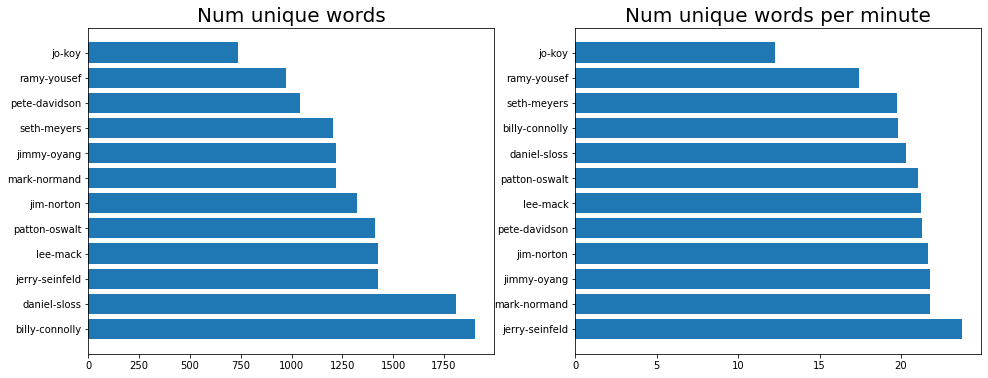

In [85]:
data = data.sort_values(by='uniques_count', ascending=False)
plt.subplot(1,2,1)
plt.barh(y_pos, data.uniques_count, align='center')
plt.yticks(y_pos, data.index)
plt.title('Num unique words', fontsize=20)

data = data.sort_values(by='WPM_Unique', ascending=False)
plt.subplot(1,2,2)
plt.barh(y_pos, data.WPM_Unique, align='center')
plt.yticks(y_pos, data.index)
plt.title('Num unique words per minute', fontsize=20)


In [86]:
badWordsDF = dtm.T[['fucking','fuck','shit']]
badWordsDF

,fucking,fuck,shit
names,,,
jerry-seinfeld,0,0,0
jo-koy,22,20,34
mark-normand,1,4,9
jimmy-oyang,9,16,37
ramy-yousef,9,27,19
pete-davidson,19,28,19
billy-connolly,43,31,19
patton-oswalt,23,12,23
lee-mack,25,7,4


In [87]:
badWordsDF = pd.concat([badWordsDF.fucking+badWordsDF.fuck, badWordsDF.shit], axis=1)
badWordsDF.columns=['f_word','s_word']
badWordsDF

,f_word,s_word
names,,
jerry-seinfeld,0,0
jo-koy,42,34
mark-normand,5,9
jimmy-oyang,25,37
ramy-yousef,36,19
pete-davidson,47,19
billy-connolly,74,19
patton-oswalt,35,23
lee-mack,32,4


Text(0, 0.5, 'S__')

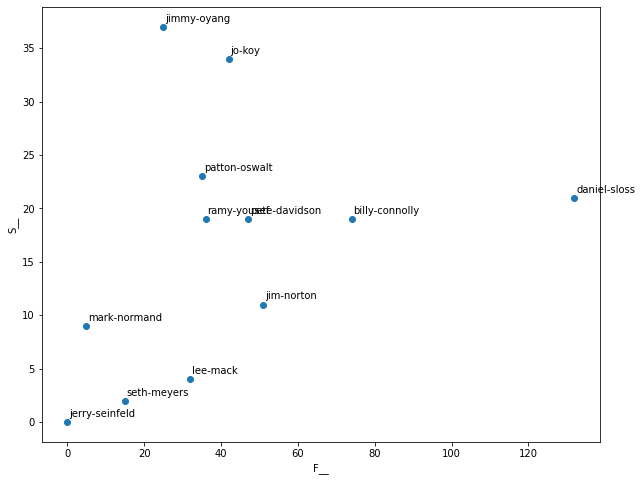

In [88]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter(badWordsDF['f_word'], badWordsDF['s_word'])
for i in badWordsDF.T.columns:
    plt.annotate(i, (badWordsDF.loc[i]["f_word"]+.5, badWordsDF.loc[i]["s_word"]+.5))
plt.xlabel("F__")
plt.ylabel("S__")